In [33]:
import os
import sys
from animate_graph import find_last_graph_file
from decentralizepy.graphs.MobilityGraph import MobilityGraph
from simulate_graph import simulate_graph

%matplotlib inline

def get_graphs(graphs_dir) -> list[MobilityGraph]:
    last_graph_file_number = find_last_graph_file(graphs_dir)
    if last_graph_file_number is None:
        print("No graph files found in the directory.")
        sys.exit(1)

    graphs = []
    for i in range(1, last_graph_file_number + 1):
        file_path = os.path.join(graphs_dir, f"graph_{i}.txt")
        if os.path.exists(file_path):
            g = MobilityGraph()
            g.read_graph_from_file(file_path)
            graphs.append(g)
        else:
            print(f"File graph_{i}.txt does not exist in the directory.")
            sys.exit(1)

    return graphs

num_nodes = 48
high_mobility_proportion = 0.05
g=f"tutorial/dynamic_48_{str(high_mobility_proportion).replace(".", "_")}.txt"
# graphs=simulate_graph(g, iterations=1000)

experiment_dir = ".saved_experiments/2024-06-17-plain-niid/2/2024-06-19T01:37-dynamic_48_0_05.txt/machine0"
# experiment_dir = ".sim"
graphs=get_graphs(experiment_dir)

/Users/santiago/projects/decentralizepy-gitlab/animate_graph.py:65: RuntimeWarning: invalid value encountered in divide
  unit_resultant_mobility_vec = np.array(resultant_mobility_vec) / np.linalg.norm(resultant_mobility_vec)
/Users/santiago/projects/decentralizepy-gitlab/.venv/lib/python3.12/site-packages/matplotlib/quiver.py:630: RuntimeWarning: Mean of empty slice.
  amean = a[~self.Umask].mean()
/Users/santiago/projects/decentralizepy-gitlab/.venv/lib/python3.12/site-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


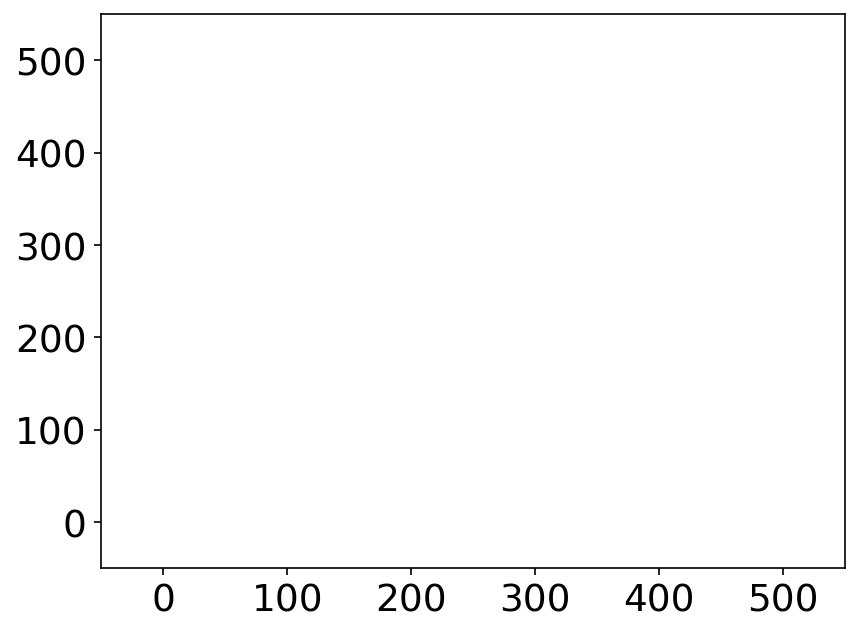

In [34]:
from matplotlib import pyplot as plt
from animate_graph import animate_graphs

plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['figure.dpi'] = 150  
plt.ioff()

plt.rcParams.update({'font.size': 18})

animate_graphs(graphs[-20:])

In [35]:
from collections import defaultdict
import json
import numpy as np
import matplotlib.pyplot as plt    
import datetime

from decentralizepy.graphs.MobilityGraph import MobilityGraph
from simulate_graph import simulate_graph


def average_of_first_percent(lst, p):
    n = int(len(lst) * p)
    return np.mean(lst[:n])

def average_of_last_percent(lst, p):
    n = int(len(lst) * p)
    return np.mean(lst[-n:])



def high_mobility_nodes(g: MobilityGraph):
    n = int(len(g.nodes) * high_mobility_proportion)
    return g.nodes[:n]

def low_mobility_nodes(g: MobilityGraph):  
    n_low = int(len(g.nodes) * high_mobility_proportion)
    return g.nodes[n_low:]

n = len(graphs)
high_mobility_neighbors = [defaultdict(set) for _ in range(n)]
low_mobility_neighbors = [defaultdict(set) for _ in range(n)]

now = datetime.datetime.now()
for (i, g) in enumerate(graphs):
    now = datetime.datetime.now()
    g.precompute_neighbours()

for (i, g) in enumerate(graphs):
    h_nodes = high_mobility_nodes(g)
    l_nodes = low_mobility_nodes(g)

    print(i)

    for node in h_nodes:
        high_mobility_neighbors[i][node.uid] = set(g.neighbors(node.uid))
    
    for node in l_nodes:
        low_mobility_neighbors[i][node.uid] = set(g.neighbors(node.uid))

print("precomputed neighbours ", datetime.datetime.now() - now)

    


Time taken to precompute neighbours: 0:00:00.122382
Time taken to precompute neighbours: 0:00:00.052166
Time taken to precompute neighbours: 0:00:00.049256
Time taken to precompute neighbours: 0:00:00.051794
Time taken to precompute neighbours: 0:00:00.050869
Time taken to precompute neighbours: 0:00:00.059500
Time taken to precompute neighbours: 0:00:00.057006
Time taken to precompute neighbours: 0:00:00.057000
Time taken to precompute neighbours: 0:00:00.056046
Time taken to precompute neighbours: 0:00:00.051235
Time taken to precompute neighbours: 0:00:00.050583
Time taken to precompute neighbours: 0:00:00.050667
Time taken to precompute neighbours: 0:00:00.049309
Time taken to precompute neighbours: 0:00:00.056717
Time taken to precompute neighbours: 0:00:00.056323
Time taken to precompute neighbours: 0:00:00.057908
Time taken to precompute neighbours: 0:00:00.053128
Time taken to precompute neighbours: 0:00:00.050053
Time taken to precompute neighbours: 0:00:00.048684
Time taken t

In [36]:
average_high_mobility_velocity = [np.mean([node.velocity for node in high_mobility_nodes(g)]) for g in graphs][0]
average_low_mobility_velocity = [np.mean([node.velocity for node in low_mobility_nodes(g)]) for g in graphs][0]

print("Average High Mobility Velocity:", average_high_mobility_velocity)
print("Average Low Mobility Velocity:", average_low_mobility_velocity)

Average High Mobility Velocity: 159.7829062264741
Average Low Mobility Velocity: 31.63540541681521


[np.float64(2.0), np.float64(2.0), np.float64(2.5), np.float64(2.5), np.float64(1.5), np.float64(3.0), np.float64(4.5), np.float64(1.5), np.float64(1.0), np.float64(2.0), np.float64(4.0), np.float64(4.5), np.float64(4.0), np.float64(3.5), np.float64(2.0), np.float64(2.0), np.float64(1.0), np.float64(0.5), np.float64(1.0), np.float64(1.0), np.float64(2.0), np.float64(3.0), np.float64(6.5), np.float64(6.0), np.float64(2.5), np.float64(1.5), np.float64(3.5), np.float64(2.0), np.float64(3.0), np.float64(2.5), np.float64(2.5), np.float64(2.5), np.float64(3.5), np.float64(5.0), np.float64(3.0), np.float64(5.5), np.float64(4.0), np.float64(3.0), np.float64(4.5), np.float64(3.5), np.float64(4.0), np.float64(5.5), np.float64(4.5), np.float64(7.5), np.float64(2.5), np.float64(3.5), np.float64(4.0), np.float64(2.0), np.float64(1.5), np.float64(1.5), np.float64(2.0), np.float64(2.5), np.float64(2.0), np.float64(2.0), np.float64(3.0), np.float64(2.5), np.float64(1.5), np.float64(4.5), np.float64(3.

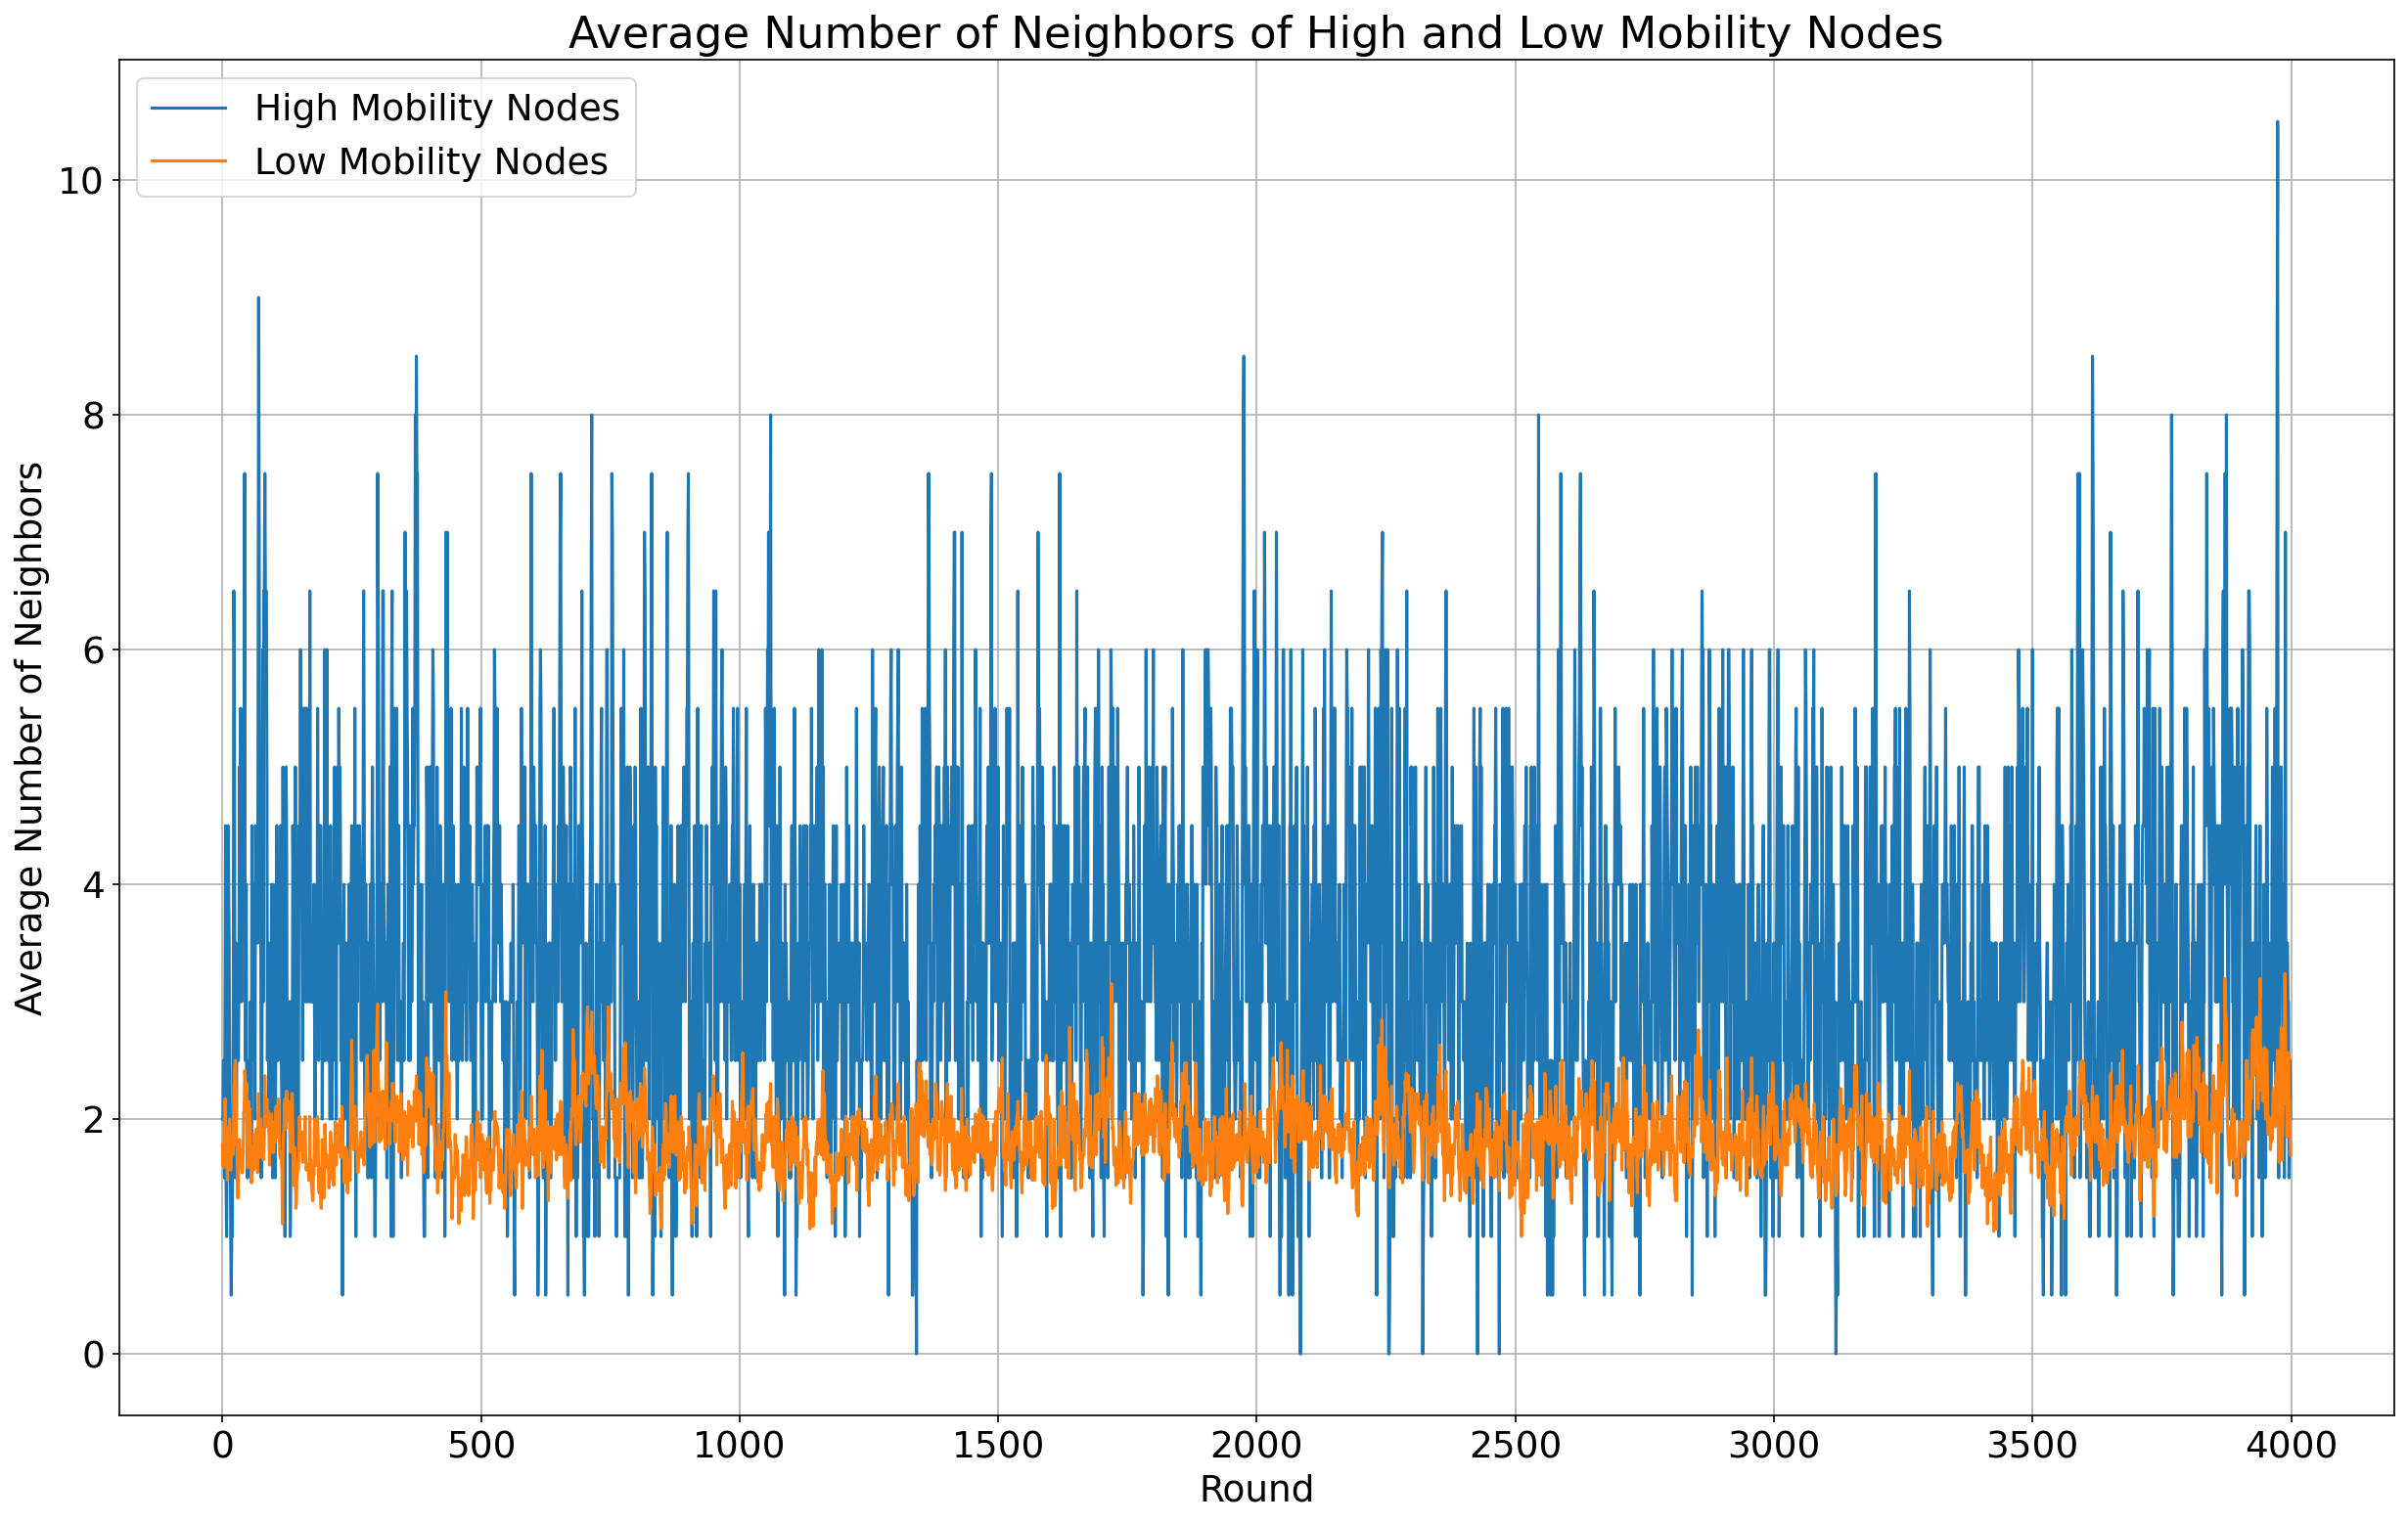

In [37]:
plt.figure(figsize=(20, 12))

average_num_neighbors_high_mobility = [np.mean([len(high_mobility_neighbors[i][node.uid]) for node in high_mobility_nodes(g)]) for i, g in enumerate(graphs)]
average_num_neighbors_low_mobility = [np.mean([len(low_mobility_neighbors[i][node.uid]) for node in low_mobility_nodes(g)]) for i, g in enumerate(graphs)]

print(average_num_neighbors_high_mobility)
print(average_num_neighbors_low_mobility)

plt.plot(average_num_neighbors_high_mobility, label="High Mobility Nodes")
plt.plot(average_num_neighbors_low_mobility, label="Low Mobility Nodes")

plt.xlabel("Round")
plt.ylabel("Average Number of Neighbors")
plt.title("Average Number of Neighbors of High and Low Mobility Nodes")
plt.legend()
plt.grid(True)
plt.show()


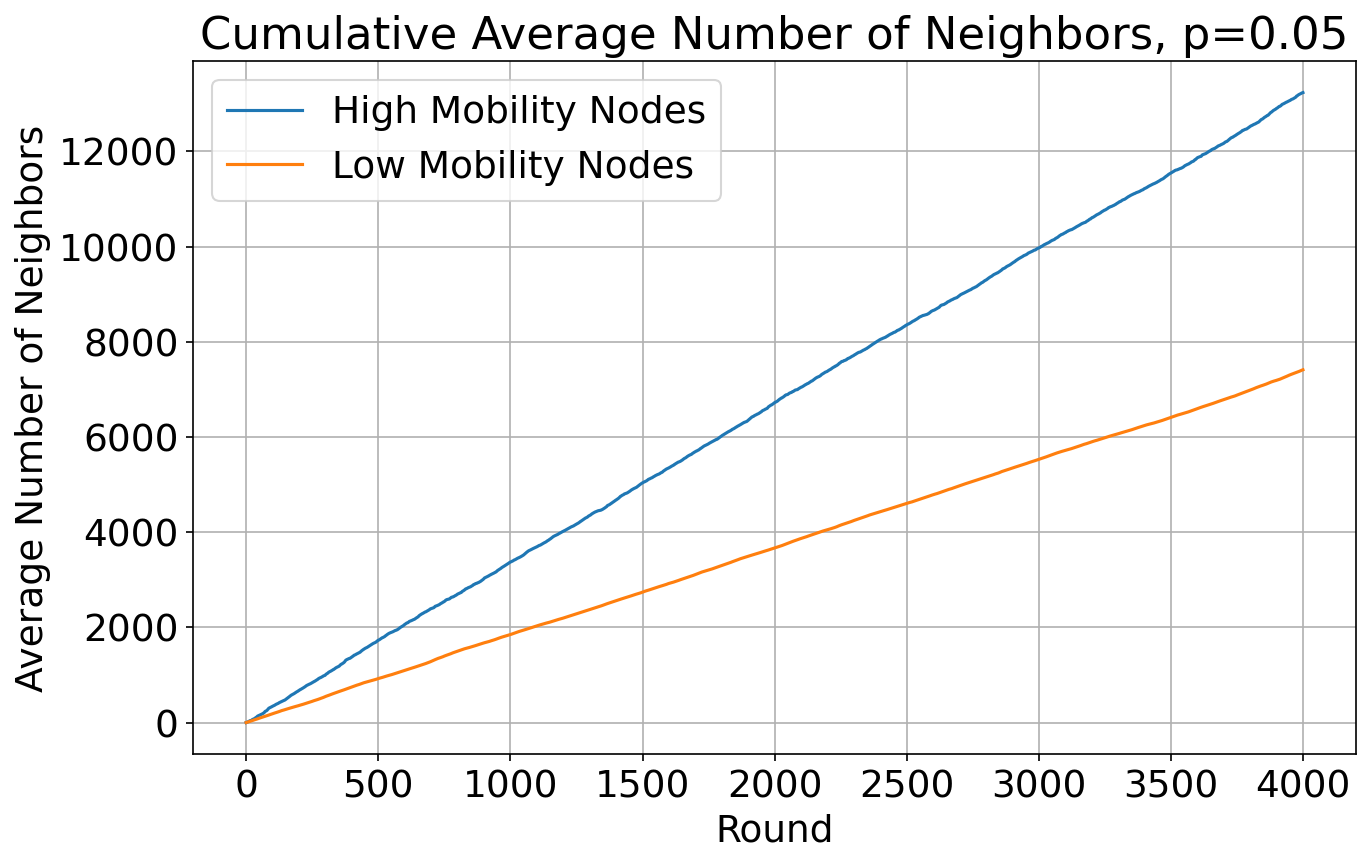

In [38]:
cumulative_num_neighbors_high_mobility = np.cumsum(np.array(average_num_neighbors_high_mobility))
cumulative_num_neighbors_low_mobility = np.cumsum(np.array(average_num_neighbors_low_mobility))

plt.figure(figsize=(10, 6))

plt.plot(cumulative_num_neighbors_high_mobility, label="High Mobility Nodes")
plt.plot(cumulative_num_neighbors_low_mobility, label="Low Mobility Nodes")

plt.xlabel("Round")
plt.ylabel("Average Number of Neighbors")
plt.title(f"Cumulative Average Number of Neighbors, p={high_mobility_proportion}")
plt.legend()
plt.grid(True)
plt.savefig(f"saved_figures/cumulative_average_neighbors_{high_mobility_proportion}.pdf")
plt.show()

[np.float64(159.7829062264741), np.float64(159.7829062264741), np.float64(143.21294395363032), np.float64(145.80332285852938), np.float64(159.7829062264741), np.float64(137.42620536830947), np.float64(137.42620536830947), np.float64(159.7829062264741), np.float64(159.7829062264741), np.float64(137.42620536830947), np.float64(107.01708593051126), np.float64(159.7829062264741), np.float64(137.56663157129975), np.float64(84.66038507234663), np.float64(159.7829062264741), np.float64(159.7829062264741), np.float64(98.78039464328162), np.float64(82.3853253038587), np.float64(98.78039464328162), np.float64(159.7829062264741), np.float64(76.423693785117), np.float64(135.15114559982158), np.float64(159.7829062264741), np.float64(159.7829062264741), np.float64(105.83373371369073), np.float64(75.48160751294593), np.float64(97.5970424264611), np.float64(159.7829062264741), np.float64(137.42620536830947), np.float64(107.01708593051126), np.float64(84.90165101699608), np.float64(105.83373371369073),

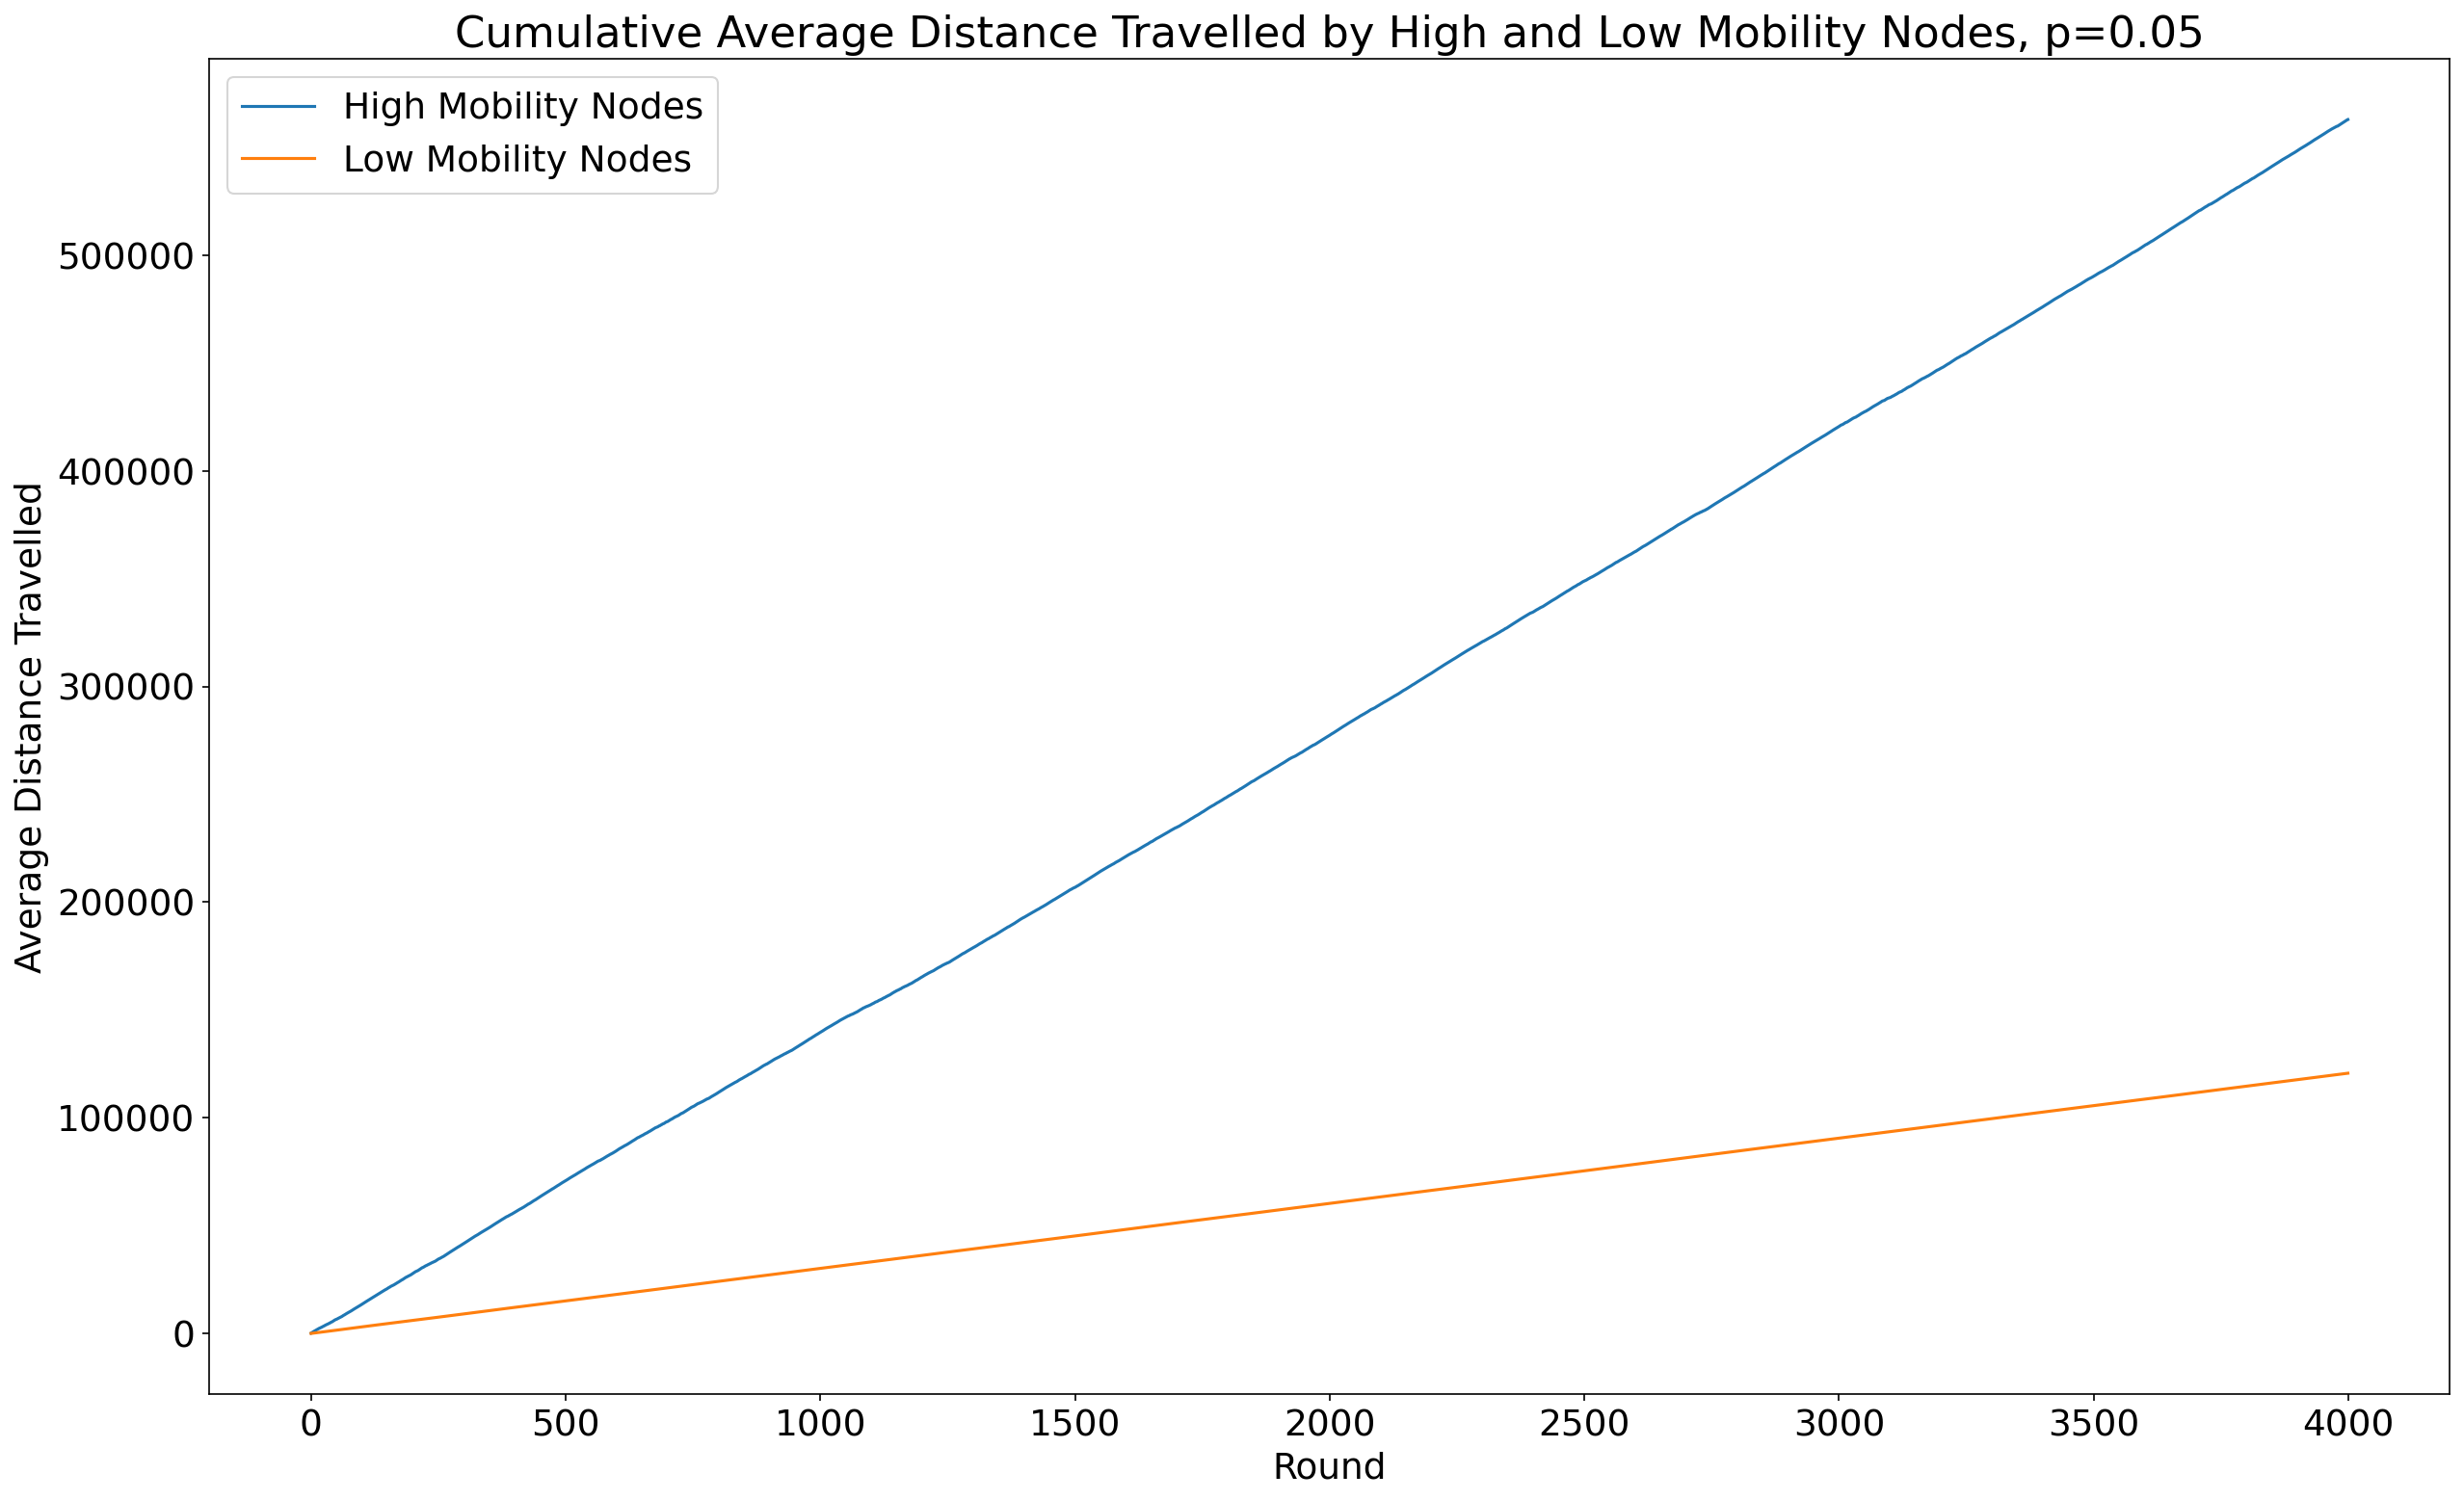

In [39]:
from decentralizepy.graphs.MobilityNode import MobilityNode


def get_node_distance_travelled(node: MobilityNode):
    return np.linalg.norm(np.array(node.pos_vec) - np.array(node.previous_pos_vec))

high_mobility_nodes_distances = [np.mean([get_node_distance_travelled(node) for node in high_mobility_nodes(g)]) for g in graphs]
low_mobility_nodes_distances = [np.mean([get_node_distance_travelled(node) for node in low_mobility_nodes(g)]) for g in graphs]
print(high_mobility_nodes_distances)
print(low_mobility_nodes_distances)

cum_high_mobility_nodes_distances = np.cumsum(np.array(high_mobility_nodes_distances))
cum_low_mobility_nodes_distances = np.cumsum(np.array(low_mobility_nodes_distances))

plt.figure(figsize=(20, 12))

plt.plot(cum_high_mobility_nodes_distances, label="High Mobility Nodes")
plt.plot(cum_low_mobility_nodes_distances, label="Low Mobility Nodes")

plt.xlabel("Round")
plt.ylabel("Average Distance Travelled")
plt.title(f"Cumulative Average Distance Travelled by High and Low Mobility Nodes, p={high_mobility_proportion}")
plt.legend()
plt.show()